In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

In [8]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

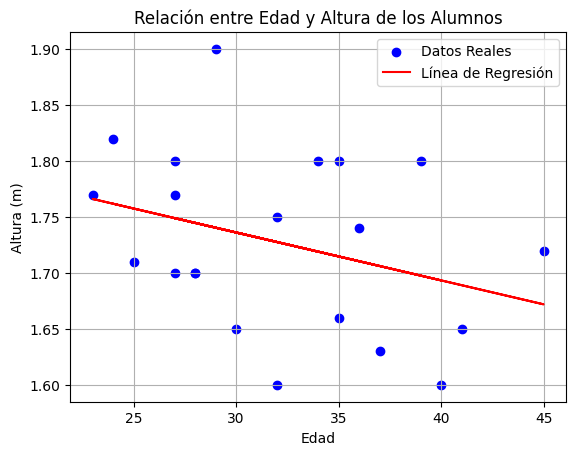

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Extraer edad y altura
edades = np.array([alumno[1] for alumno in lista_alumnos]).reshape(-1, 1)
alturas = np.array([alumno[2] for alumno in lista_alumnos])

# Crear el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(edades, alturas)

# Predecir alturas utilizando el modelo
alturas_pred = modelo.predict(edades)

# Dibujar el gráfico
plt.scatter(edades, alturas, color='blue', label='Datos Reales')
plt.plot(edades, alturas_pred, color='red', label='Línea de Regresión')
plt.xlabel('Edad')
plt.ylabel('Altura (m)')
plt.title('Relación entre Edad y Altura de los Alumnos')
plt.legend()
plt.grid()
plt.show()




### ¿Es una buena técnica para este tipo de problemas? Demuéstralo antes de entrenar un modelo con un análisis descriptivo.

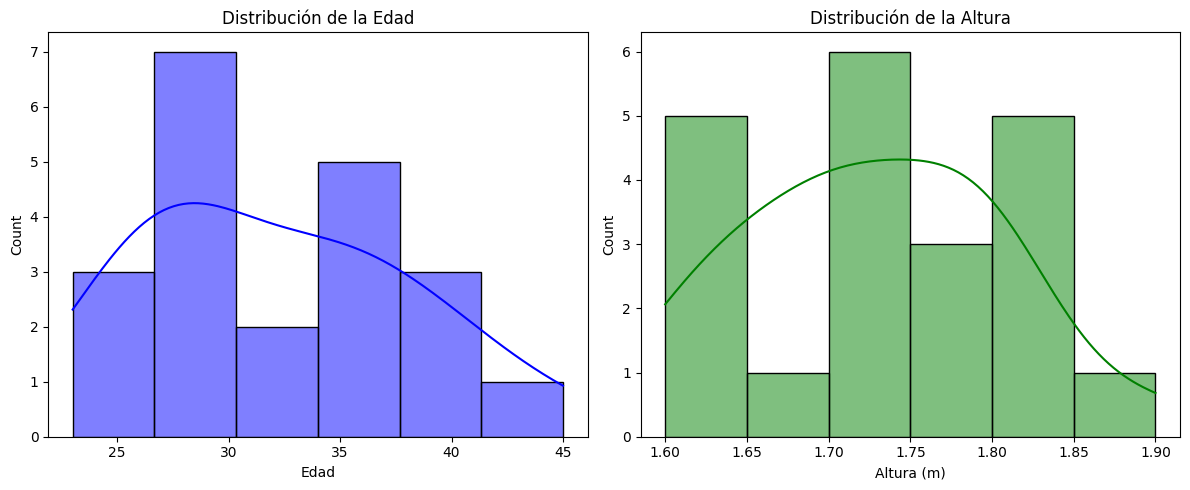

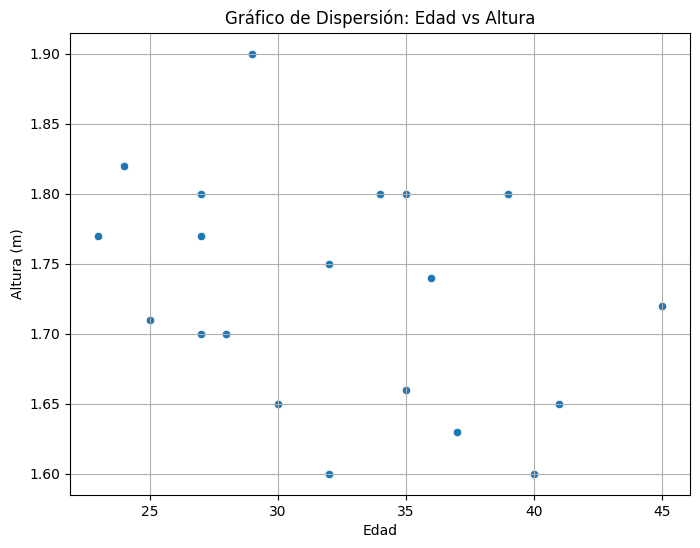

Coeficiente de Correlación de Pearson: -0.33


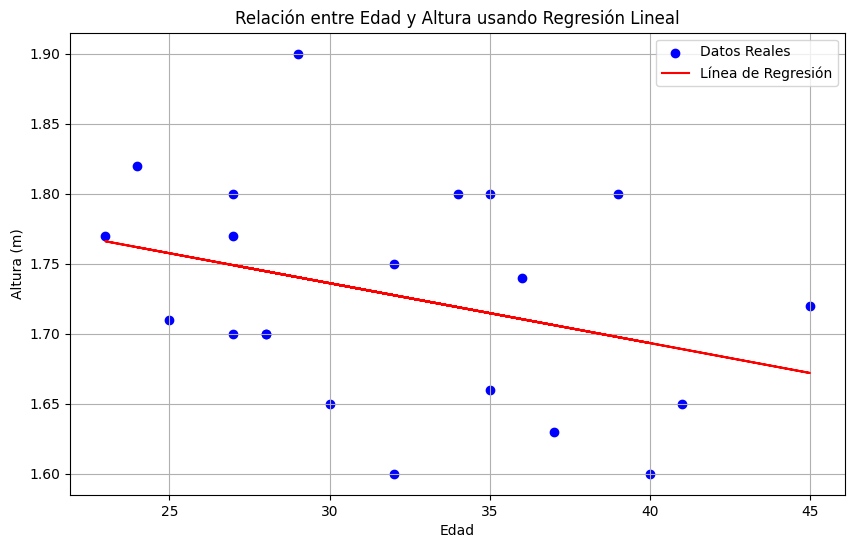

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Crear DataFrame usando pandas
datos = {
    "Nombre": [
        "Leonardo S", "Piero T", "Marta B", "Silvia P", "Faro Z", "Miguel N",
        "Alejandro M", "Cristina M", "Francisco P", "Jorge D", "Jesús L",
        "Marta G", "Jennifer S", "Diego I", "Antonio C", "Juan M", "David S",
        "Antonio J", "Carlos H", "Erik U", "Marcos L"
    ],
    "Edad": [
        24, 25, 35, 37, 29, 27, 28, 32, 36, 45, 41, 30, 40, 39,
        23, 32, 27, 34, 27, 28, 35
    ],
    "Altura": [
        1.82, 1.71, 1.66, 1.63, 1.90, 1.80, 1.70, 1.60, 1.74, 1.72,
        1.65, 1.65, 1.60, 1.80, 1.77, 1.75, 1.70, 1.80, 1.77, 1.70, 1.80
    ]
}

# Crear el DataFrame
df = pd.DataFrame(datos)

# Análisis Descriptivo
# 1. Histograma para Edad y Altura
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Edad'], kde=True, color='blue')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')

plt.subplot(1, 2, 2)
sns.histplot(df['Altura'], kde=True, color='green')
plt.title('Distribución de la Altura')
plt.xlabel('Altura (m)')
plt.tight_layout()
plt.show()

# 2. Gráfico de Dispersión para evaluar la relación
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Edad', y='Altura', data=df)
plt.title('Gráfico de Dispersión: Edad vs Altura')
plt.xlabel('Edad')
plt.ylabel('Altura (m)')
plt.grid()
plt.show()

# 3. Calcular el coeficiente de correlación de Pearson
correlacion = df['Edad'].corr(df['Altura'])
print(f"Coeficiente de Correlación de Pearson: {correlacion:.2f}")

# 4. Ajuste de Regresión Lineal
modelo = LinearRegression()
X = df[['Edad']]  # Variable independiente (Edad)
y = df['Altura']  # Variable dependiente (Altura)
modelo.fit(X, y)

# Predecir alturas utilizando el modelo ajustado
df['Altura_Pred'] = modelo.predict(X)

# Dibujar el gráfico de Regresión Lineal
plt.figure(figsize=(10, 6))
plt.scatter(df['Edad'], df['Altura'], color='blue', label='Datos Reales')
plt.plot(df['Edad'], df['Altura_Pred'], color='red', label='Línea de Regresión')
plt.xlabel('Edad')
plt.ylabel('Altura (m)')
plt.title('Relación entre Edad y Altura usando Regresión Lineal')
plt.legend()
plt.grid()
plt.show()


La relación lineal entre edad y altura no es fuerte, como indica el coeficiente de correlación y el gráfico de dispersión.
La regresión lineal puede no ser la mejor técnica para este conjunto de datos debido a la falta de una relación clara y fuerte.
En este caso, podrías considerar otras técnicas o modelos más adecuados, como:

Modelos de regresión polinómica, si crees que podría haber una relación no lineal.
Análisis más detallados utilizando agrupaciones (clustering) para segmentar los datos.
Si decides seguir con la regresión lineal, ten en cuenta que el modelo podría tener un rendimiento limitado debido a la baja correlación entre las variables. ​

### Entrena un modelo de regresión lineal

y = a + b*x

altura = a + b*Edad

### ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo de forma manual con python. Aparte, usa las métricas de sklearn MAE, MAPE, MSE y el RMSE.